In [15]:
import numpy as np
import pandas as pd
import math
import LinRegLearner as lrl
import InsaneLearner as il
import RTLearner as rtl
import BagLearner as bl
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
%matplotlib inline

In [16]:
def eval_method(trainX, trainY, testX, testY, learner, verbose=True):
    result = {}
    # evaluate in sample
    predY = learner.query(trainX)  # get the predictions
    rmse = math.sqrt(((trainY - predY) ** 2).sum() / trainY.shape[0])
    c = np.corrcoef(predY, y=trainY)
    if verbose:
        print
        print "In sample results"
        print "RMSE: ", rmse
        print "corr: ", c[0, 1]
    result['train'] = {'rmse': rmse, 'corr': c[0,1]}

    # evaluate out of sample
    predY = learner.query(testX)  # get the predictions
    rmse = math.sqrt(((testY - predY) ** 2).sum() / testY.shape[0])
    c = np.corrcoef(predY, y=testY)
    if verbose:
        print
        print "Out of sample results"
        print "RMSE: ", rmse
        print "corr: ", c[0, 1]
    result['test'] = {'rmse': rmse, 'corr': c[0,1]}
    
    return result

In [17]:
file_name = 'Data/Istanbul.csv'
data = np.genfromtxt(file_name, delimiter=',')
# Skip the date column and header row if we're working on Istanbul data
if 'Istanbul' in file_name:
    data = data[1:, 1:]

# compute how much of the data is training and testing
train_rows = int(0.6 * data.shape[0])
test_rows = data.shape[0] - train_rows

# separate out training and testing data
# trainX = data[:train_rows, 0:-1]
# trainY = data[:train_rows, -1]
# testX = data[train_rows:, 0:-1]
# testY = data[train_rows:, -1]

ind = np.random.choice(data.shape[0], data.shape[0]*0.6, replace=False)
ind = np.array([i in ind for i in range(data.shape[0])])
trainX = data[ind, 0:-1]
trainY = data[ind, -1]
testX = data[~ind, 0:-1]
testY = data[~ind, -1]

print data.shape
print trainX.shape
print testX.shape

(536, 9)
(321, 8)
(215, 8)


/Users/tiansu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [18]:
# # create a learner and train it
# learner = lrl.LinRegLearner(verbose=True)  # create a LinRegLearner
# # learner = il.InsaneLearner(verbose=False)
# learner.addEvidence(trainX, trainY)  # train it
# result = eval_method(trainX, trainY, testX, testY, learner)

In [19]:
# # create a learner and train it
# # learner = lrl.LinRegLearner(verbose=True)  # create a LinRegLearner
# learner = il.InsaneLearner(verbose=False)
# learner.addEvidence(trainX, trainY)  # train it
# result = eval_method(trainX, trainY, testX, testY, learner)

In [20]:
# create a learner and train it
result = []
for iiiii in range(20) + range(20, 100, 5) + range(100, 500, 20):
    print iiiii
    learner = rtl.RTLearner(leaf_size=iiiii, verbose=True)  # create a LinRegLearner
    # learner = il.InsaneLearner(verbose=False)
    learner.addEvidence(trainX, trainY)  # train it
    result.append([iiiii, eval_method(trainX, trainY, testX, testY, learner)])

0

In sample results
RMSE:  0.0
corr:  1.0

Out of sample results
RMSE:  0.00888521741243
corr:  0.63125698263
1

In sample results
RMSE:  0.0
corr:  1.0

Out of sample results
RMSE:  0.00842008023198
corr:  0.674495115117
2

In sample results
RMSE:  0.00422691530416
corr:  0.914578302313

Out of sample results
RMSE:  0.0090938293028
corr:  0.62914481844
3

In sample results
RMSE:  0.00484533909049
corr:  0.886056964479

Out of sample results
RMSE:  0.00824996947409
corr:  0.694846559704
4

In sample results
RMSE:  0.00504469396205
corr:  0.875813547583

Out of sample results
RMSE:  0.00746052692288
corr:  0.7223603683
5

In sample results
RMSE:  0.00539935181517
corr:  0.856238097799

Out of sample results
RMSE:  0.00790037363558
corr:  0.701466235316
6

In sample results
RMSE:  0.00531553215474
corr:  0.861025398098

Out of sample results
RMSE:  0.00776452205257
corr:  0.693464731791
7

In sample results
RMSE:  0.00562152320081
corr:  0.84304849217

Out of sample results
RMSE:  0.007

In [21]:
# result

In [22]:
def get_error_df(result):
    error = []
    for iiiii in result:
        error.append([iiiii[0], iiiii[1]['test']['rmse'], iiiii[1]['train']['rmse']])

    df = pd.DataFrame(error)
    df.columns = ['leaf_size', 'test_error', 'train_error']
    return df

df = get_error_df(result)
df

,leaf_size,test_error,train_error
0,0,0.008885,0.000000
1,1,0.008420,0.000000
2,2,0.009094,0.004227
3,3,0.008250,0.004845
4,4,0.007461,0.005045
5,5,0.007900,0.005399
6,6,0.007765,0.005316
7,7,0.007516,0.005622
8,8,0.008019,0.006160
9,9,0.007759,0.006534


In [23]:
def moving_average(a, n=5) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [24]:
def plot_curve(df_plot, axv=None):
    df_plot.plot()
    if axv:
        plt.axvline(x=axv, color='r')
    plt.xlabel("leaf_size")
    plt.ylabel("rmse")
    plt.xlim([0, 200])
    plt.legend()
    plt.title("RTLearner: leaf-size & overfitting")
    plt.show

In [25]:
df_plot.columns

Index([u'test_error', u'train_error'], dtype='object')

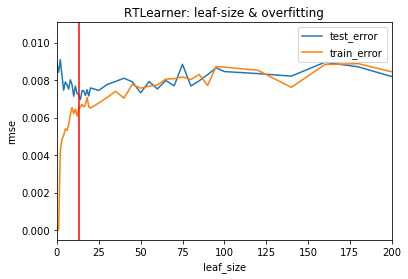

In [26]:
df_plot = df.set_index('leaf_size')
plot_curve(df_plot, 13)

# TODO: not working yet. but not too far. work on it if have time
# df_plot_smooth = df_plot.copy()
# np_smooth_0 = moving_average(np.array(df_plot.ix[:, 0]), n=5)
# np_smooth_1 = moving_average(np.array(df_plot.ix[:, 1]), n=5)
# df_plot_smooth['test_error'] = np_smooth_0
# df_plot_smooth['train_error'] = np_smooth_1
# plot_curve(df_plot_smooth)


In [13]:
# create a learner and train it
result = []
for iiiii in range(20) + range(20, 100, 5) + range(100, 500, 20):
    print iiiii
    learner = bl.BagLearner(learner=rtl.RTLearner, kwargs=dict(leaf_size=iiiii, verbose=True), 
                            bags=20, boost=False, verbose=False)  # create a LinRegLearner
    # learner = il.InsaneLearner(verbose=False)
    learner.addEvidence(trainX, trainY)  # train it
    result.append([iiiii, eval_method(trainX, trainY, testX, testY, learner)])
df = get_error_df(result)
df

0

In sample results
RMSE:  0.0024140664752
corr:  0.979703728678

Out of sample results
RMSE:  0.00607432835511
corr:  0.820837403855
1

In sample results
RMSE:  0.00243359825263
corr:  0.979708209284

Out of sample results
RMSE:  0.00594125131048
corr:  0.834723929625
2

In sample results
RMSE:  0.00285066155002
corr:  0.971653692649

Out of sample results
RMSE:  0.00631289026951
corr:  0.805118120667
3

In sample results
RMSE:  0.00357824413917
corr:  0.952965953912

Out of sample results
RMSE:  0.00627151439898
corr:  0.810415554593
4

In sample results
RMSE:  0.00380499740632
corr:  0.944662272171

Out of sample results
RMSE:  0.00591091129824
corr:  0.830740187497
5

In sample results
RMSE:  0.00435078299852
corr:  0.925042125314

Out of sample results
RMSE:  0.00616114993013
corr:  0.816964924661
6

In sample results
RMSE:  0.00458210558919
corr:  0.914992364743

Out of sample results
RMSE:  0.00609844911895
corr:  0.825160474825
7

In sample results
RMSE:  0.00491024359952
corr

,leaf_size,test_error,train_error
0,0,0.006074,0.002414
1,1,0.005941,0.002434
2,2,0.006313,0.002851
3,3,0.006272,0.003578
4,4,0.005911,0.003805
5,5,0.006161,0.004351
6,6,0.006098,0.004582
7,7,0.006062,0.004910
8,8,0.006149,0.004898
9,9,0.006215,0.005155


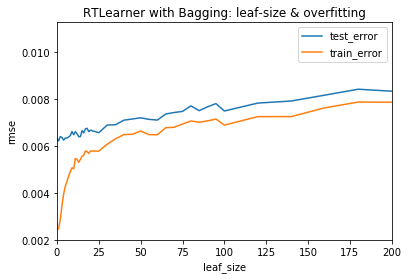

In [136]:
def plot_curve(df_plot, axv=None):
    df_plot.plot()
    if axv:
        plt.axvline(x=axv, color='r')
    plt.xlabel("leaf_size")
    plt.ylabel("rmse")
    plt.xlim([0, 200])
    plt.legend()
    plt.title("RTLearner with Bagging: leaf-size & overfitting")
    plt.show
    
df_plot = df.set_index('leaf_size')
plot_curve(df_plot)

bag number:  1
bag number:  2
bag number:  3
bag number:  5
bag number:  10
bag number:  20


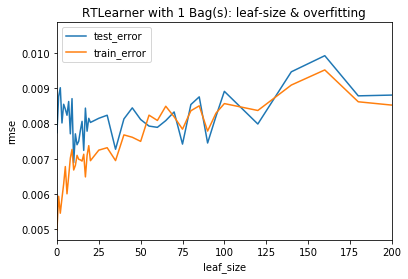

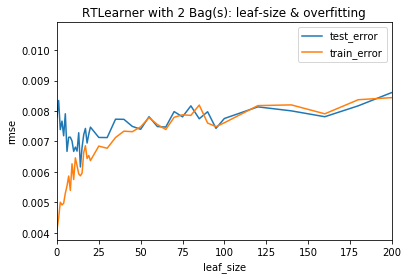

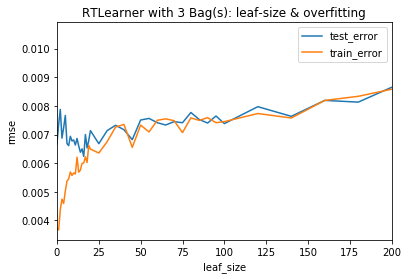

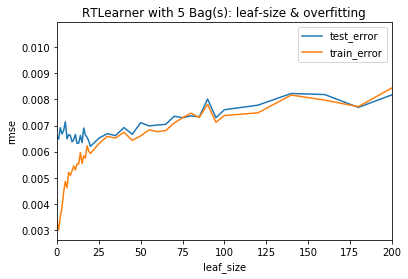

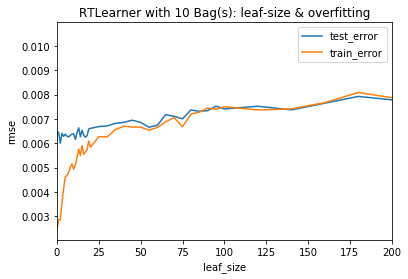

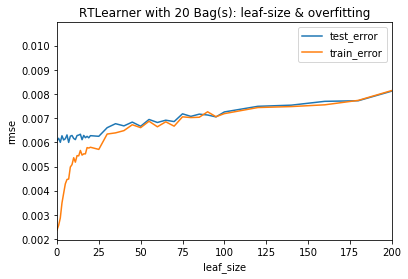

In [27]:
# create a learner and train it
for num_bag in [1, 2, 3, 5, 10, 20]:
    result = []
    for iiiii in range(20) + range(20, 100, 5) + range(100, 500, 20):
#         print iiiii
        learner = bl.BagLearner(learner=rtl.RTLearner, kwargs=dict(leaf_size=iiiii, verbose=True), 
                                bags=num_bag, boost=False, verbose=False)  # create a LinRegLearner
        # learner = il.InsaneLearner(verbose=False)
        learner.addEvidence(trainX, trainY)  # train it
        result.append([iiiii, eval_method(trainX, trainY, testX, testY, learner, verbose=False)])
    df = get_error_df(result)

    def plot_curve(df_plot, axv=None):
        df_plot.plot()
        if axv:
            plt.axvline(x=axv, color='r')
        plt.xlabel("leaf_size")
        plt.ylabel("rmse")
        plt.xlim([0, 200])
        plt.legend()
        plt.title("RTLearner with {0} Bag(s): leaf-size & overfitting".format(num_bag))
        plt.show

    df_plot = df.set_index('leaf_size')
    print "bag number: ", num_bag
    plot_curve(df_plot)

In [28]:
# create a learner and train it
result = []
leaf_size = 1
for iiiii in range(1, 10, 1) + range(10, 200, 10):
    print iiiii
    learner = bl.BagLearner(learner=rtl.RTLearner, kwargs=dict(leaf_size=leaf_size, verbose=True), 
                            bags=iiiii, boost=False, verbose=False)  # create a LinRegLearner
    # learner = il.InsaneLearner(verbose=False)
    learner.addEvidence(trainX, trainY)  # train it
    result.append([iiiii, eval_method(trainX, trainY, testX, testY, learner)])
df = get_error_df(result)
df

1

In sample results
RMSE:  0.00633630643686
corr:  0.815464306951

Out of sample results
RMSE:  0.00897695379001
corr:  0.601312977728
2

In sample results
RMSE:  0.00396707165909
corr:  0.925243506616

Out of sample results
RMSE:  0.00765615494783
corr:  0.704322845764
3

In sample results
RMSE:  0.00406650287471
corr:  0.922702163929

Out of sample results
RMSE:  0.00708872793489
corr:  0.758967722343
4

In sample results
RMSE:  0.00327343987253
corr:  0.953868269468

Out of sample results
RMSE:  0.00741347805126
corr:  0.717272238489
5

In sample results
RMSE:  0.00277735187639
corr:  0.965062542982

Out of sample results
RMSE:  0.00663042926972
corr:  0.779844637108
6

In sample results
RMSE:  0.00344515775322
corr:  0.948799941483

Out of sample results
RMSE:  0.00686439397664
corr:  0.762649089532
7

In sample results
RMSE:  0.00294386183349
corr:  0.967241398461

Out of sample results
RMSE:  0.00647397916978
corr:  0.793807285153
8

In sample results
RMSE:  0.00262295795762
cor

,leaf_size,test_error,train_error
0,1,0.008977,0.006336
1,2,0.007656,0.003967
2,3,0.007089,0.004067
3,4,0.007413,0.003273
4,5,0.006630,0.002777
5,6,0.006864,0.003445
6,7,0.006474,0.002944
7,8,0.006750,0.002623
8,9,0.006214,0.002699
9,10,0.006376,0.002535


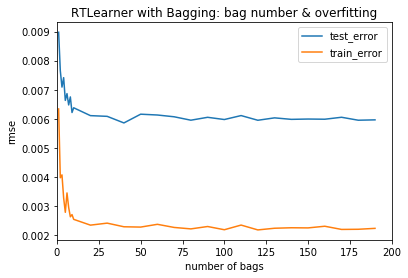

In [29]:
def plot_curve(df_plot, axv=None):
    df_plot.plot()
    if axv:
        plt.axvline(x=axv, color='r')
    plt.xlabel("number of bags")
    plt.ylabel("rmse")
    plt.xlim([0, 200])
    plt.legend()
    plt.title("RTLearner with Bagging: bag number & overfitting")
    plt.show
    
df_plot = df.set_index('leaf_size')
plot_curve(df_plot)

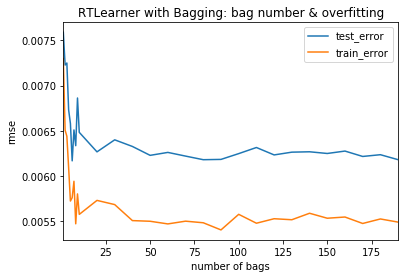

In [30]:
# create a learner and train it
result = []
leaf_size = 15
for iiiii in range(1, 10, 1) + range(10, 200, 10):
#     print iiiii
    learner = bl.BagLearner(learner=rtl.RTLearner, kwargs=dict(leaf_size=leaf_size, verbose=True), 
                            bags=iiiii, boost=False, verbose=False)  # create a LinRegLearner
    # learner = il.InsaneLearner(verbose=False)
    learner.addEvidence(trainX, trainY)  # train it
    result.append([iiiii, eval_method(trainX, trainY, testX, testY, learner, verbose=False)])
df = get_error_df(result)
df_plot = df.set_index('leaf_size')

def plot_curve(df_plot, axv=None):
    df_plot.plot()
    if axv:
        plt.axvline(x=axv, color='r')
    plt.xlabel("number of bags")
    plt.ylabel("rmse")
#     plt.xlim([0, 200])
    plt.legend()
    plt.title("RTLearner with Bagging: bag number & overfitting")
    plt.show
plot_curve(df_plot)

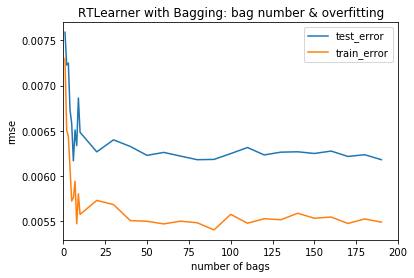

In [32]:
def plot_curve(df_plot, axv=None):
    df_plot.plot()
    if axv:
        plt.axvline(x=axv, color='r')
    plt.xlabel("number of bags")
    plt.ylabel("rmse")
    plt.xlim([0, 200])
    plt.legend()
    plt.title("RTLearner with Bagging: bag number & overfitting")
    plt.show
plot_curve(df_plot)

In [14]:
# create a learner and train it
result = []
leaf_size = 1
for iiiii in range(1, 10, 1) + range(10, 50, 10) + range(50, 200, 20) + range(200, 500, 20):
#     print iiiii
    learner = bl.BagLearner(learner=rtl.RTLearner, kwargs=dict(leaf_size=leaf_size, verbose=True), 
                            bags=iiiii, boost=False, verbose=False)  # create a LinRegLearner
    # learner = il.InsaneLearner(verbose=False)
    learner.addEvidence(trainX, trainY)  # train it
    result.append([iiiii, eval_method(trainX, trainY, testX, testY, learner, verbose=False)])
df = get_error_df(result)
df_plot = df.set_index('leaf_size')

def plot_curve(df_plot, axv=None):
    df_plot.plot()
    if axv:
        plt.axvline(x=axv, color='r')
    plt.xlabel("number of bags")
    plt.ylabel("rmse")
#     plt.xlim([0, 200])
    plt.legend()
    plt.title("RTLearner with Bagging: bag number & overfitting")
    plt.show
plot_curve(df_plot)

KeyboardInterrupt: 

In [7]:
# create a learner and train it
# learner = lrl.LinRegLearner(verbose=True)  # create a LinRegLearner
learner = il.InsaneLearner(verbose=False, learner=rtl.RTLearner)
learner.addEvidence(trainX, trainY)  # train it
result = eval_method(trainX, trainY, testX, testY, learner)


In sample results
RMSE:  0.0024496805483
corr:  0.986835711483

Out of sample results
RMSE:  0.00453872428252
corr:  0.834515245992


In [9]:
# create a learner and train it
# learner = lrl.LinRegLearner(verbose=True)  # create a LinRegLearner
for iiiii in [1, 10, 20, 50, 100, 200]:
    print iiiii
    learner = bl.BagLearner(learner=rtl.RTLearner, kwargs=dict(verbose=True), 
                            bags=iiiii, boost=False, verbose=False)
    learner.addEvidence(trainX, trainY)  # train it
    result = eval_method(trainX, trainY, testX, testY, learner)

1

In sample results
RMSE:  0.00627237996986
corr:  0.860917327585

Out of sample results
RMSE:  0.0101977292891
corr:  0.568810569613
10

In sample results
RMSE:  0.00304735582459
corr:  0.971832961622

Out of sample results
RMSE:  0.0049184053169
corr:  0.801230804388
20

In sample results
RMSE:  0.00275342450499
corr:  0.978180769335

Out of sample results
RMSE:  0.00483179586352
corr:  0.816166203347
50

In sample results
RMSE:  0.00262790047497
corr:  0.982365748419

Out of sample results
RMSE:  0.00465444965853
corr:  0.824993759887
100

In sample results
RMSE:  0.0024663082265
corr:  0.986223975859

Out of sample results
RMSE:  0.00462366332832
corr:  0.827534340199
200

In sample results
RMSE:  0.00246621845938
corr:  0.986326660797

Out of sample results
RMSE:  0.00452115003705
corr:  0.836418695371
